#libraries

In [3]:
!pip install pandas numpy matplotlib yfinance scikit-learn tensorflow

In [4]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

#using yahoo finance for dataset, mention start date and stock code

In [5]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [7]:
data = load_data('AAPL')
df=data
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.288578,24.757332,23.848704,24.746224,212818400
1,2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000
2,2015-01-06,23.606556,23.866481,23.244437,23.668760,263188400
3,2015-01-07,23.937571,24.037541,23.704304,23.815383,160423600
4,2015-01-08,24.857302,24.915063,24.148616,24.266361,237458000


In [8]:
print(df.columns.tolist())

[('Date', ''), ('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]


In [9]:
df = df.drop([('Date', ''),('Adj Clone', 'AAPL')], axis = 1, errors = 'ignore')
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.288578,24.757332,23.848704,24.746224,212818400
1,23.604330,24.137511,23.417718,24.057533,257142000
2,23.606556,23.866481,23.244437,23.668760,263188400
3,23.937571,24.037541,23.704304,23.815383,160423600
4,24.857302,24.915063,24.148616,24.266361,237458000


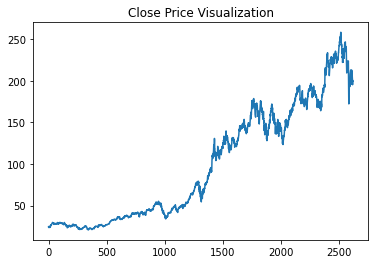

In [10]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [11]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.288578,24.757332,23.848704,24.746224,212818400
1,23.604330,24.137511,23.417718,24.057533,257142000
2,23.606556,23.866481,23.244437,23.668760,263188400
3,23.937571,24.037541,23.704304,23.815383,160423600
4,24.857302,24.915063,24.148616,24.266361,237458000
...,...,...,...,...,...
2612,201.360001,202.750000,199.699997,200.710007,46742400
2613,195.270004,197.699997,193.460007,193.669998,78432900
2614,200.210007,200.740005,197.429993,198.300003,56288500


#plotting graph of moving avg of 150 days

In [12]:
ma150 = df.Close.rolling(150).mean()
ma150

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2612,226.158955
2613,225.920968
2614,225.713456
2615,225.488410


Text(0.5, 1.0, 'Graph Of Moving Averages Of 150 Days')

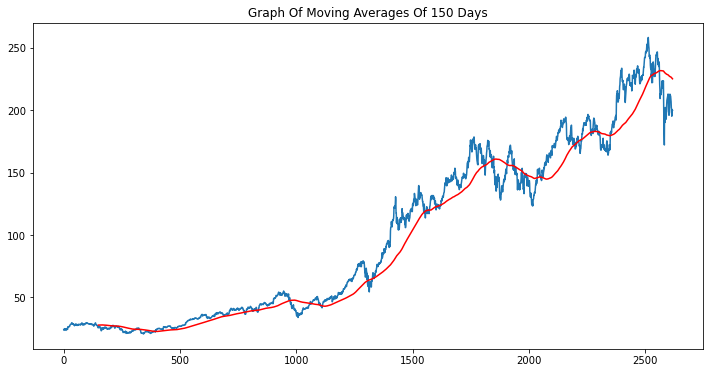

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma150, 'r')
plt.title('Graph Of Moving Averages Of 150 Days')

#plotting graph of 250 days and comparing 150 days and 250days moving avg



In [17]:
ma250 = df.Close.rolling(250).mean()
ma250

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2612,222.761167
2613,222.798207
2614,222.842664
2615,222.887922


Text(0.5, 1.0, 'Comparision Of 150 Days And 250 Days Moving Averages')

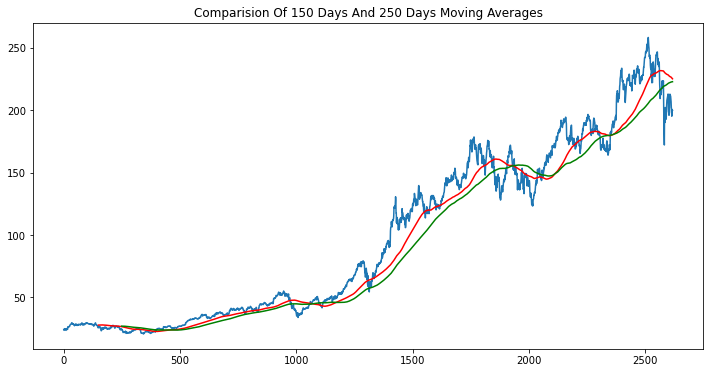

In [19]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma150, 'r')
plt.plot(ma250, 'g')
plt.title('Comparision Of 150 Days And 250 Days Moving Averages')

In [20]:
df.shape

(2617, 5)

#splitting data in 70:30 ratio

In [21]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1831, 6)
(786, 6)


In [22]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.288578,24.757332,23.848704,24.746224,212818400
1,2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000
2,2015-01-06,23.606556,23.866481,23.244437,23.668760,263188400
3,2015-01-07,23.937571,24.037541,23.704304,23.815383,160423600
4,2015-01-08,24.857302,24.915063,24.148616,24.266361,237458000


In [23]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
1831,2022-04-11,162.893463,166.116934,162.647772,165.802457,72246700
1832,2022-04-12,164.770554,166.942458,163.768128,165.124350,79265200
1833,2022-04-13,167.463333,168.092303,163.895902,164.505213,70618900
1834,2022-04-14,162.441391,168.318343,162.195699,167.679536,75329400
1835,2022-04-18,162.225204,163.728835,160.751055,161.095014,69023900


#using minmax scaler for normalization of dataset



In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [25]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [26]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.02631937],
       [0.02197937],
       [0.01952939],
       ...,
       [0.93783504],
       [0.93040341],
       [0.93424295]])

In [27]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [28]:
x_train.shape

(1731, 100, 1)

#Ml model [LSTM]


In [29]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [30]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

D:\anacode\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

#Training of model [50 Epoch]



In [31]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train,epochs = 50)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - MAE: 0.1720 - loss: 0.0689
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - MAE: 0.0523 - loss: 0.0066
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - MAE: 0.0429 - loss: 0.0051
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - MAE: 0.0425 - loss: 0.0051
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - MAE: 0.0434 - loss: 0.0049
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - MAE: 0.0389 - loss: 0.0042
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - MAE: 0.0401 - loss: 0.0044
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - MAE: 0.0416 - loss: 0.0045
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - MAE: 0.0401 - loss: 0.0041
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - MAE: 0.0394 - loss: 0.0040
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - MAE: 0.0390 - loss: 0.0039
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - MAE: 0.0382 - loss: 0.0038
Epoch 13/50
55/55 ━━━━━━━━━━━━

In [32]:
model.save('keras_model.h5')

In [33]:

test_close.shape
test_close

array([[165.80245707],
       [165.12434995],
       [164.50521264],
       [167.67953575],
       [161.09501448],
       [162.17607196],
       [165.85162307],
       [165.99900306],
       [163.59125523],
       [158.34324409],
       [159.45378918],
       [153.22305965],
       [156.50549702],
       [159.05086745],
       [154.00928951],
       [155.42444099],
       [156.91827281],
       [161.02623866],
       [153.54661874],
       [152.48364388],
       [153.0643437 ],
       [151.0762377 ],
       [140.51563537],
       [142.30694138],
       [143.25176455],
       [146.50950978],
       [144.53125145],
       [137.67130943],
       [136.8937958 ],
       [135.61427683],
       [138.58661405],
       [136.24419796],
       [135.22063281],
       [143.09429845],
       [146.71617095],
       [147.53309012],
       [145.49579813],
       [144.5804304 ],
       [144.7083895 ],
       [142.070736  ],
       [146.23393898],
       [144.75762101],
       [138.06497716],
       [130

In [34]:
past_100_days = pd.DataFrame(train_close[-100:])

In [35]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [36]:
final_df = past_100_days.append(test_df, ignore_index = True)

C:\Users\Rishav\AppData\Local\Temp\ipykernel_8892\1505569079.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [37]:
final_df.head()

,0
0,147.168443
1,148.208853
2,150.868765
3,154.735902
4,158.691460


In [38]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.1709832 ],
       [0.17879584],
       [0.19876964],
       [0.22780872],
       [0.25751177],
       [0.25338419],
       [0.25065718],
       [0.24196024],
       [0.24048597],
       [0.24505587],
       [0.30025991],
       [0.2358426 ],
       [0.27475849],
       [0.27674838],
       [0.31205247],
       [0.33453224],
       [0.35502169],
       [0.35723292],
       [0.40079181],
       [0.35752822],
       [0.35649598],
       [0.38723035],
       [0.31831719],
       [0.30615644],
       [0.33033131],
       [0.34123914],
       [0.36194995],
       [0.37108941],
       [0.39371647],
       [0.38759892],
       [0.38863094],
       [0.37845986],
       [0.37654322],
       [0.4119213 ],
       [0.38966263],
       [0.33873329],
       [0.34013356],
       [0.31205242],
       [0.33593263],
       [0.36394027],
       [0.36143401],
       [0.32870969],
       [0.3299625 ],
       [0.31883329],
       [0.2965746 ],
       [0.27770655],
       [0.24527664],
       [0.237

In [37]:
input_data.shape

(885, 1)

#Testing model



In [39]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(786, 100, 1)
(786,)


#Making Prediction



In [41]:
# Making predictions

y_pred = model.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


In [42]:
y_pred.shape

(786, 1)

In [43]:
y_test

array([0.31090963, 0.30581759, 0.30116837, 0.32500498, 0.27556053,
       0.2836784 , 0.31127882, 0.31238553, 0.29430528, 0.25489695,
       0.26323625, 0.21644849, 0.24109695, 0.26021063, 0.22235244,
       0.23297909, 0.24419656, 0.27504408, 0.21887816, 0.21089607,
       0.21525666, 0.20032759, 0.12102597, 0.13447724, 0.1415721 ,
       0.16603514, 0.15118001, 0.09966738, 0.09382888, 0.08422072,
       0.10654058, 0.08895092, 0.08126477, 0.14038966, 0.167587  ,
       0.1737214 , 0.15842298, 0.15154931, 0.15251018, 0.13270353,
       0.16396583, 0.15287987, 0.10262351, 0.04785898, 0.04978057,
       0.05835361, 0.04202028, 0.02716531, 0.05192395, 0.06204906,
       0.0770522 , 0.099815  , 0.12050877, 0.1162963 , 0.08178202,
       0.08023001, 0.07128729, 0.08407322, 0.11053159, 0.12486913,
       0.13942889, 0.14245902, 0.14312397, 0.12265215, 0.1307081 ,
       0.17283454, 0.17992937, 0.15908796, 0.18273771, 0.20771834,
       0.214296  , 0.20409683, 0.19116312, 0.19352814, 0.22604

In [44]:
y_pred

array([[0.36723524],
       [0.36967957],
       [0.3686881 ],
       [0.3645497 ],
       [0.35821104],
       [0.3501753 ],
       [0.34104773],
       [0.3317886 ],
       [0.32323757],
       [0.31580025],
       [0.3093009 ],
       [0.30359536],
       [0.29833606],
       [0.29341525],
       [0.28894794],
       [0.28487793],
       [0.28117192],
       [0.2778444 ],
       [0.27503043],
       [0.27264643],
       [0.27048177],
       [0.2682643 ],
       [0.26565874],
       [0.26168674],
       [0.25586993],
       [0.24846968],
       [0.24029703],
       [0.23172638],
       [0.22307341],
       [0.21477365],
       [0.20676541],
       [0.19863157],
       [0.19041349],
       [0.18214442],
       [0.17423892],
       [0.16718179],
       [0.16133744],
       [0.15694812],
       [0.1539838 ],
       [0.15233335],
       [0.15172546],
       [0.15196106],
       [0.15282954],
       [0.15400113],
       [0.15503857],
       [0.15551284],
       [0.1551094 ],
       [0.153

In [44]:
scaler.scale_

array([0.00750919])

In [45]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

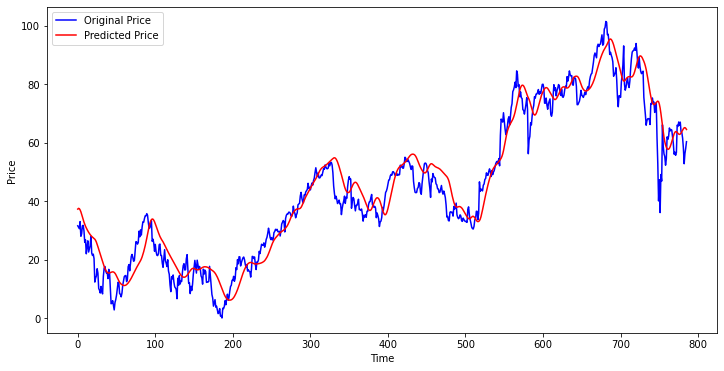

In [46]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

#Model evaluation

In [47]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  5.03634294577942
